# Restaurant Recommendation System_
## Prepare import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import warnings
warnings.filterwarnings("ignore")

## Load Data
### GoogleReview
#### View Sample, Check Null Data For Review

In [2]:
ratings_data = pd.read_csv('GoogleReview_data_cleaned.csv')
ratings_data = ratings_data[['Author', 'Rating', 'Review', 'Restaurant', 'Location']]
print("Review data:", ratings_data.shape)
print("\nCheck NULL values in Reviews:\n-----------------------------")
print(ratings_data.isnull().sum())
print("-----------------------------")
ratings_data.head()

Review data: (222020, 5)

Check NULL values in Reviews:
-----------------------------
Author        0
Rating        0
Review        0
Restaurant    0
Location      0
dtype: int64
-----------------------------


,Author,Rating,Review,Restaurant,Location
0,Jia Pin Lee,4.0,Came here for the High Tea. Great service espe...,Cuisines Restaurant,Ipoh
1,Chui Yi Lum,2.0,"5 stars for the service, even though some of t...",Cuisines Restaurant,Ipoh
2,liezel wong,1.0,"Hi, thank you for your service. But! i feel so...",Cuisines Restaurant,Ipoh
3,Nazri Nor,1.0,I have the worse buffer dinner ever so far. Th...,Cuisines Restaurant,Ipoh
4,Fakru Imran's Channel,5.0,"That's are Known 5 Elmark "" 9H72 "" & KDK "" 3 K...",Cuisines Restaurant,Ipoh


In [3]:
df_data3 = ratings_data.copy()
df_data3.head()

,Author,Rating,Review,Restaurant,Location
0,Jia Pin Lee,4.0,Came here for the High Tea. Great service espe...,Cuisines Restaurant,Ipoh
1,Chui Yi Lum,2.0,"5 stars for the service, even though some of t...",Cuisines Restaurant,Ipoh
2,liezel wong,1.0,"Hi, thank you for your service. But! i feel so...",Cuisines Restaurant,Ipoh
3,Nazri Nor,1.0,I have the worse buffer dinner ever so far. Th...,Cuisines Restaurant,Ipoh
4,Fakru Imran's Channel,5.0,"That's are Known 5 Elmark "" 9H72 "" & KDK "" 3 K...",Cuisines Restaurant,Ipoh


# Data Visualization

### Amount Counting On Each Rating's Level: 1, 2, 3, 4, 5

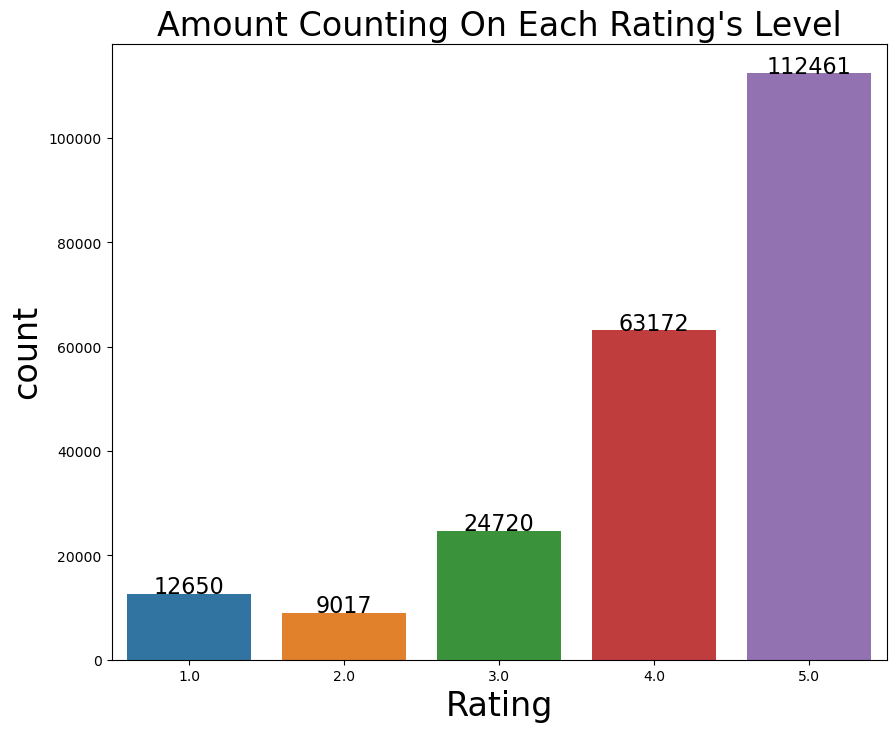

In [4]:
plt.figure(figsize=(10, 8))
plt.title("Amount Counting On Each Rating's Level", fontsize = 24)
plt.xlabel("X label", fontsize = 24)  
plt.ylabel("Y label", fontsize = 24)   
sns.countplot(x = "Rating", data = df_data3)

# Display actual value on top of each bar
new_data = df_data3.sort_values('Rating', ascending = False)

for i in range(len(new_data["Rating"].value_counts())):
    count = new_data["Rating"].value_counts().sort_index().values[i]
    plt.text(x = i, y = count + 1, s = count, ha = 'center', fontsize = 16)

# Popularity-Based Recommendation System

##### Based on RATING of Recipes by all Users

#### a. Recommend based on Average Popularity-Based Filtering

In [5]:
def search_most_trending_restaurant(dataset):
    # A counter to initialize all the ratings based on restaurant name
    restaurant_rating_count = pd.DataFrame(dataset.groupby("Restaurant")["Rating"].count().reset_index())
    
    # Rename the column name 
    restaurant_rating_count.rename(columns={"Rating":"NumberOfVotes"}, inplace = True)
    
    # An average variable for the mean number of all ratings based on restaurant name
    restaurant_rating_average = pd.DataFrame(dataset.groupby("Restaurant")["Rating"].mean().reset_index())
    
    # Rename the column name 
    restaurant_rating_average.rename(columns = {"Rating":"AverageRatings"}, inplace = True)
    
    popularRestaurants = restaurant_rating_count.merge(restaurant_rating_average, on = "Restaurant")
    
    return popularRestaurants.head(20)

### a. User Interaction Sessions 

In [6]:
combined_rating = search_most_trending_restaurant(df_data3)

In [7]:
# Select Restaurant with more than 50 ratings sorted in descending order by avg-ratings
popular_restaurant = combined_rating[combined_rating['NumberOfVotes'] > 50].sort_values(by = 'AverageRatings'  , ascending= False).reset_index(drop = True).head(50)

popular_restaurant.head(20)

,Restaurant,NumberOfVotes,AverageRatings
0,27@cove,53,4.735849
1,20 Chulia Lane Cafe,62,4.725806
2,718 Pizza,63,4.698413
3,5 Foot Way Bistro & Cafe,52,4.423077
4,16th St. Cafe,134,4.388060
5,86 Cold Drink,62,4.387097
6,33 Blue Room,300,4.376667
7,218 Hainan Lor Mee,75,4.360000
8,A Jie Cafe,259,4.320463
9,1919 Restaurant Ipoh,142,4.281690


#### b. Recommend based on the Highest Popularity Recommendation

In [8]:
def popularity(dataset, number):
    number = int(number)
    if number >= 1 and number < len(dataset):
        data = pd.DataFrame(dataset.groupby("Restaurant")["Rating"].count())
        sorted_data = data.sort_values("Rating", ascending = False).head(number)
        result = pd.merge(sorted_data, df_data3, on = "Restaurant")
        return result
    print("\nInvalid number of restaurants! No restaurants will be recommended.")

### b. User Interaction Sessions 

In [9]:
print("Welcome Sir/Madam!\nThis session is about Highest Popularity Recommendation...")
print("----------------------------------------------------------")
print("NOTE: Please provide in NUMBER")
noOfRestaurants = input("Try to enter the total number of restaurants for us to recommend for you: ")

Welcome Sir/Madam!
This session is about Highest Popularity Recommendation...
----------------------------------------------------------
NOTE: Please provide in NUMBER
Try to enter the total number of restaurants for us to recommend for you: 10


In [10]:
print("💠Highest Popularity Recommendation")
temp_data = popularity(df_data3, noOfRestaurants)
new_data = temp_data['Restaurant'].unique()
print("===============================================================")
print("Here's the TOP " + noOfRestaurants + " of Restaurants Title Recommended For You:-")
print("===============================================================")
for counter, value in enumerate(new_data):
    print(f"{counter + 1}. {value}")
print("===============================================================")
print("         =============================================")

💠Highest Popularity Recommendation
Here's the TOP 10 of Restaurants Title Recommended For You:-
1. Khan’s Indian Cuisine
2. Plan B (Ipoh)
3. Miker Food
4. Ming Court Hong Kong Dim Sum 明阁香港点心
5. Restoran Kacang Pool Haji
6. Pak Putra Restaurant
7. Antipodean Cafe
8. Antipodean @ Atria
9. Topspot Food Court
10. Canopy Lounge Rooftop Bar KL


#### c. Recommend with Similar User Of Preference Based On Restaurant Name

In [16]:
def showRestaurants(dataset, number):
    restaurants = dataset["Restaurant"].unique()
    
    for counter, value in enumerate(restaurants):
        print(f"{counter + 1}. {value}")
        
        # To stop the row outputing based on the number retricted
        if counter >= int(number) - 1:
            break

In [17]:
def getRestaurants(dataset, restaurantName, number):
    # Remove duplicate users
    author = dataset["Author"].unique()
    
    # Extract out the current restaurant name given by user
    # As to show the other restaurant based on this name
    match_rows = df_data3[df_data3["Restaurant"] != restaurantName]
    
    # To get the same user
    if author[0] in list(match_rows["Author"].unique()):
        match_rows = match_rows[match_rows["Author"] == author[0]]
    
    # Sort the output based on rating value from top to low
    match_rows = match_rows.sort_values(by = ["Rating"], ascending = False)
    
    # To show the output based on the desire inputted number of restaurants
    showRestaurants(match_rows, number)

### c. User Interaction Sessions 

Sample Data
- Ming Court Hong Kong Dim Sum 明阁香港点心
- I Love You Cafe
- 718 Pizza

In [21]:
print("Welcome Sir/Madam! This session is about:\nDifferent Restaurants Recommended From All Authors Based On Later Input Restaurant Name...")
print("-------------------------------------------------------------------------------------------")
print("NOTE: Restaurant NAME must be in full form")
restaurantName = input("Please provide a restaurant name: ")

Welcome Sir/Madam! This session is about:
Different Restaurants Recommended From All Authors Based On Later Input Restaurant Name...
-------------------------------------------------------------------------------------------
NOTE: Restaurant NAME must be in full form
Please provide a restaurant name: Ming Court Hong Kong Dim Sum 明阁香港点心


In [22]:
if restaurantName in list(df_data3["Restaurant"]):
    print("💠Recommended Restaurants")
    print("=================================================================")
    print("Here's the OTHER Restaurants Name Recommended For You:-")
    print("=================================================================")
    
    dataset = df_data3[df_data3["Restaurant"] == restaurantName]
     
    getRestaurants(dataset, restaurantName, noOfRestaurants)
    
    print("=============================================================")
    print("        ============================================")
else: 
    print("No Restaurants Found...")

💠Recommended Restaurants
Here's the OTHER Restaurants Name Recommended For You:-
1. Rubin Mardini Cafe & Restaurant
2. THE HILLSIDE
3. Gudang Café
4. The Mermaid Cafe . Ikan Bakar
5. Monaliza Café
6. Sarkies
7. I Love You Cafe
8. Narrow Marrow
9. Tan Sam Guan Sea Food
10. Li Er Cafe 莉儿


#### d. Recommend based on given Location

In [23]:
def searchLocation(dataset, location):
#     location = location.lower()
    
    if location in dataset["Location"].unique():
        return dataset[dataset["Location"] == location]
    else:
        print("❌ Unmatched/Invalid location entered!")

### d. User Interaction Sessions 

Sample Data:
- KL
- Petaling Jaya
- Ipoh

In [24]:
print("Welcome Sir/Madam!\nThis session is about Popular Restaurant Recommendation in Specific Area")
print("--------------------------------------------------------------------------")
print("\nHere're available CITY: ")
print("=======================")
print("Ipoh, KL, Petaling Jaya, Miri, Melaka")
print("Kuching, Langkawi, Penang, Shah Alam, JB\n")
print("\nNOTE: Please provide in Exact Full Name of City\n")
location = input("Enter a location for us to recommend popular restaurant within the area for you: ")


Welcome Sir/Madam!
This session is about Popular Restaurant Recommendation in Specific Area
--------------------------------------------------------------------------

Here're available CITY: 
Ipoh, KL, Petaling Jaya, Miri, Melaka
Kuching, Langkawi, Penang, Shah Alam, JB


NOTE: Please provide in Exact Full Name of City

Enter a location for us to recommend popular restaurant within the area for you: Ipoh


In [25]:
result_data = searchLocation(df_data3, location)
temp_data = popularity(result_data, noOfRestaurants)
final_data = temp_data['Restaurant'].unique()

print("💠Popularity Restaurant Recommended in LOCATION: " + location)
print("===============================================================")
print("Here's the TOP " + noOfRestaurants + " of Restaurants Title Recommended For You:-")
print("===============================================================")
for counter, value in enumerate(final_data):
    print(f"{counter + 1}. {value}")
print("===============================================================")
print("         =============================================")

💠Popularity Restaurant Recommended in LOCATION: Ipoh
Here's the TOP 10 of Restaurants Title Recommended For You:-
1. Plan B (Ipoh)
2. Ming Court Hong Kong Dim Sum 明阁香港点心
3. Miker Food
4. Greentown Dimsum Café
5. Restoran Mee Rebus Ramli @ Taman Tasek Jaya
6. Foh San Restaurant
7. Ipoh Tuck Kee Restaurant 德记炒粉专门店
8. Canning Dim Sum
9. Pakeeza Restaurant & Catering
10. Restoran Simpang Tiga


#### e. Recommend based on Weighted Average Ratings

A weighted average is an average in which some of the items to be averaged are 'more important' or 'less important' than some of the others. The weights are (non-negative) numbers which measure the relative importance.

A restaurant that has a high number of ratings should be given more weight than a restaurant that has only a few ratings when calculating the overall rating of the restaurant. In this case, the number of ratings is an indicator of the restaurant's popularity, and the weight given to each rating should be proportional to the number of ratings.

In [26]:
def search_most_trending_restaurant(dataset):
    # A counter to initialize all the ratings based on restaurant name
    restaurant_rating_count = pd.DataFrame(dataset.groupby("Restaurant")["Rating"].count().reset_index())
    
    # Rename the column name 
    restaurant_rating_count.rename(columns={"Rating":"NumberOfVotes"}, inplace = True)
    
    # An average variable for the mean number of all ratings based on restaurant name
    restaurant_rating_average = pd.DataFrame(dataset.groupby("Restaurant")["Rating"].mean().reset_index())
    
    # Rename the column name 
    restaurant_rating_average.rename(columns = {"Rating":"AverageRatings"}, inplace = True)
    
    popularRestaurants = restaurant_rating_count.merge(restaurant_rating_average, on = "Restaurant")
    
    # Calculate the Mean Rating
    C = popularRestaurants["AverageRatings"].mean()
    
    # Calculate the 90th Percentile of the number of votes
    m = popularRestaurants["NumberOfVotes"].quantile(0.90)

    # Calculate Weighted Rating
    def weighted_rate(row):
        # Extract AverageRatings and NumberOfVotes for the current row
        v = row["NumberOfVotes"]
        R = row["AverageRatings"]    
        
        # Calculate the weighted rating using the given formula
#         weight = num_votes / (num_votes + m)
#         weighted_rating = (avg_rating * num_votes / (num_votes + m)) + (C * m / (num_votes + m))
       
        return ((v * R) + (m * C)) / (v + m)
        
    popularRestaurants = popularRestaurants[popularRestaurants["NumberOfVotes"] >= 250]
    popularRestaurants["Popularity"] = popularRestaurants.apply(weighted_rate, axis = 1)
    popularRestaurants = popularRestaurants.sort_values(by = "Popularity", ascending = False)
    
    return popularRestaurants[["Restaurant", "NumberOfVotes", "AverageRatings", "Popularity"]].reset_index(drop = True).head(10)

### e. User Interaction Sessions 

In [26]:
combined_rating = search_most_trending_restaurant(df_data3)
combined_rating

,Restaurant,NumberOfVotes,AverageRatings,Popularity
0,Antipodean Cafe,988,4.641700,4.519884
1,Dining In The Dark KL,668,4.675150,4.502697
2,The Baboon House,817,4.635251,4.496518
3,Antipodean @ Atria,971,4.611740,4.495366
4,Haroo Korean Restaurant,426,4.746479,4.487067
5,Knowhere Bangsar,650,4.609231,4.454327
6,The Argan Trees Restaurant-Moroccan and Medite...,296,4.793919,4.454044
7,Canopy Lounge Rooftop Bar KL,948,4.551688,4.447604
8,Cheang Kee Restaurant,423,4.678487,4.446211
9,AIN- ARABIA Restaurant & Cafe Langkawi,258,4.821705,4.443746
